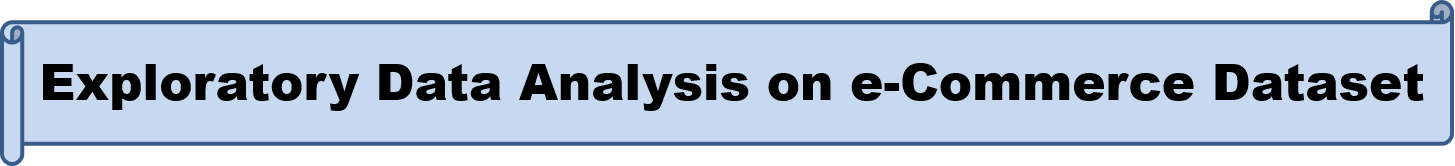

        This is Kaggle's one of the largest dataset on e-Commerce with half a million transactions record. It contains information regarding the sale of products in e-Commerce site along with their Qty, Price, SKU, Status, Payment mode,Discount, date etc.,

In this Notebook I have performed the following:

 Data Preparation and Cleaning

- Replacing Missing Values

- Dropping null columns

- Renaming Column Names

- DataType casting

 Exploratory Analysis and Visualization

- Popularity of Category

- Top 10 categories visualisation

- Impact of  Payment Mode on Order Status

- Profitable Year Distribution

- Seasonality over the years across Months

 Inferences and Conclusions


### Import libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Load dataset

In [173]:
data = pd.read_csv(r"C:\Users\Use\Desktop\Internships\eCommerce\Ecommerce Dataset.csv", parse_dates = (["created_at", "Working Date"]))

### Data Preparation and Cleaning

In [83]:
data.shape

(1048575, 26)

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  da

##### Data contains 1048574 rows but maximum columns contain 584524 records.

In [174]:
data.isnull().sum()

item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

#####  It is observed that half of the rows are completely empty and there are 5 totally null columns and so it can be dropped.

In [175]:
data.drop(['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25'], axis = 1, inplace = True)

In [176]:
data.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
1048570,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### There are some rows with NAN entries. we can't drop all na rows as actual data set also contain few NA entries. We need to keep them. We will drop NA values where all entries are Null.

In [177]:
data = data.dropna(how="all")

In [178]:
data.tail()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
584519,905204.0,cod,2018-08-28,WOFSCE5AE00357AECDE,699.0,1.0,849.0,100562385,Women's Fashion,NaN,...,cod,2018-08-28,Valid,699,2018.0,8.0,2018-8,8-2018,FY19,115320.0
584520,905205.0,processing,2018-08-28,MATHUA5AF70A7D1E50A,35599.0,1.0,35899.0,100562386,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"35,599",2018.0,8.0,2018-8,8-2018,FY19,115326.0
584521,905206.0,processing,2018-08-28,MATSAM5B6D7208C6D30,129999.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"259,998",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584522,905207.0,processing,2018-08-28,MATSAM5B1509B4696EA,87300.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"174,600",2018.0,8.0,2018-7,8-2018,FY19,113474.0
584523,905208.0,processing,2018-08-28,MATSAM5B10F91A9B6AB,108640.0,2.0,652178.0,100562387,Mobiles & Tablets,NaN,...,bankalfalah,2018-08-28,Gross,"217,280",2018.0,8.0,2018-7,8-2018,FY19,113474.0


### Handling Missing Values

In [179]:
data.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             164
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

##### Generally null values of Categorical variables are replaced with mode and numerical variables are replaced with mean. Here,let's consider 'Status' and 'Category Name' and replace the null values with its mode

In [181]:
data['status'] = data['status'].fillna(data['status'].mode()[0])

In [182]:
data['category_name_1'] = data['category_name_1'].fillna(data['category_name_1'].mode()[0])

In [183]:
data.isnull().sum()

item_id                       0
status                        0
created_at                    0
sku                          20
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1               0
sales_commission_code    137175
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
 MV                           0
Year                          0
Month                         0
Customer Since               11
M-Y                           0
FY                            0
Customer ID                  11
dtype: int64

##### In the above list, there is some extra space in "MV" column. Lets remove it. And 'created_at' can be renamed to 'order_date'

In [184]:
data.rename(columns ={" MV " :"MV", "created_at":"Order_Date"}, inplace = True)
#data.columns = data.columns.str.replace(" MV " , "MV") --> can also be used to change column name

In [185]:
data.columns

Index(['item_id', 'status', 'Order_Date', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [97]:
data.dtypes

item_id                         float64
status                           object
Order_Date               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date             datetime64[ns]
BI Status                        object
MV                               object
Year                            float64
Month                           float64
Customer Since                   object
M-Y                              object
FY                               object
Customer ID                     float64
dtype: object

### Type Casting

##### As observed above in the list, some columns are not in correct datatype. Let's perform datatype casting and convert the data type

In [186]:
data['Customer ID'] = data['Customer ID'].astype('str')
data['item_id'] = data['item_id'].astype('str')
data['qty_ordered'] = data['qty_ordered'].astype('int')
data['Month'] = data['Month'].astype('int')
data['Year'] = data['Year'].astype('int')


In [187]:
data.dtypes

item_id                          object
status                           object
Order_Date               datetime64[ns]
sku                              object
price                           float64
qty_ordered                       int32
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date             datetime64[ns]
BI Status                        object
MV                               object
Year                              int32
Month                             int32
Customer Since                   object
M-Y                              object
FY                               object
Customer ID                      object
dtype: object

### Data Exploration

###  Top Selling Category

In [188]:
data.category_name_1.value_counts()

Mobiles & Tablets     115874
Men's Fashion          92221
Women's Fashion        59721
Appliances             52413
Superstore             43613
Beauty & Grooming      41496
Soghaat                34011
Others                 29218
Home & Living          26504
Entertainment          26326
Health & Sports        17502
Kids & Baby            16494
Computing              15933
\N                      7850
School & Education      3478
Books                   1870
Name: category_name_1, dtype: int64

##### Mobiles& Tablets tops the category list 

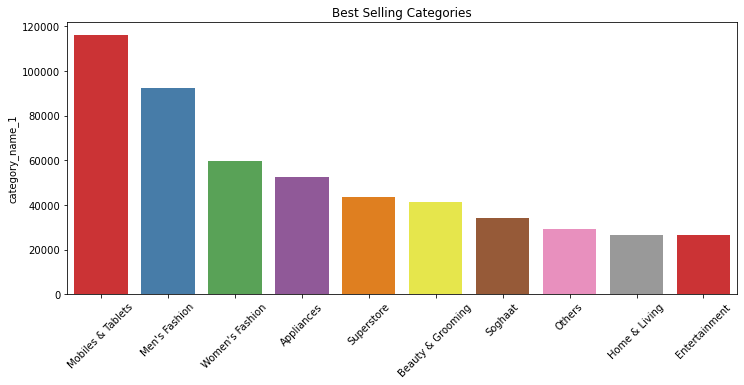

In [189]:
top_10 = data['category_name_1'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize = (12,5))
plt.title("Best Selling Categories")
plt.ylabel("Total Order")
plt.xticks(rotation = 45)

sns.barplot(top_10.index, y=top_10,palette = 'Set1')
plt.show()

### Payment Method vs Order Status

##### Now plot correlation between completed order and Payment mode

In [190]:
corr_comp = data.loc[data['status']=='complete']['payment_method'].value_counts().sort_values(ascending = False).to_frame('Mode Of Payment')
corr_comp

,Mode Of Payment
cod,148053
Payaxis,22809
Easypay,19214
easypay_voucher,16066
jazzwallet,13505
jazzvoucher,4619
customercredit,4151
Easypay_MA,3116
cashatdoorstep,674
bankalfalah,587


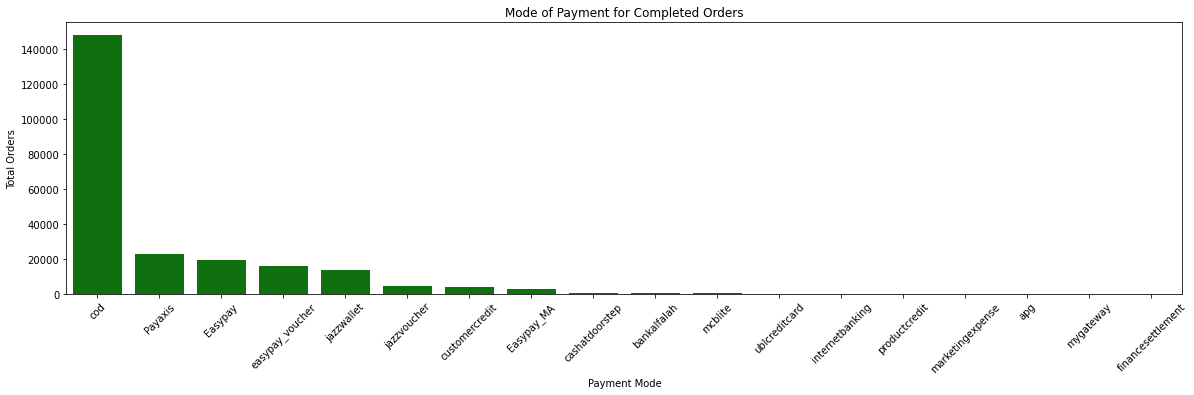

In [191]:

plt.figure(figsize = (20,5))
plt.title("Mode of Payment for Completed Orders")
sns.barplot(corr_comp.index, y=corr_comp['Mode Of Payment'],color = 'g')
plt.ylabel("Total Orders")
plt.xlabel('Payment Mode')
plt.xticks(rotation = 45)
plt.show()

##### Cash On Delivery is highly prevalent among other modes of payment

##### Now let's plot correlation between canceled order and Payment mode

In [192]:
corr_can = data.loc[data['status']=='canceled']['payment_method'].value_counts().sort_values(ascending = False).to_frame('Mode Of Payment')


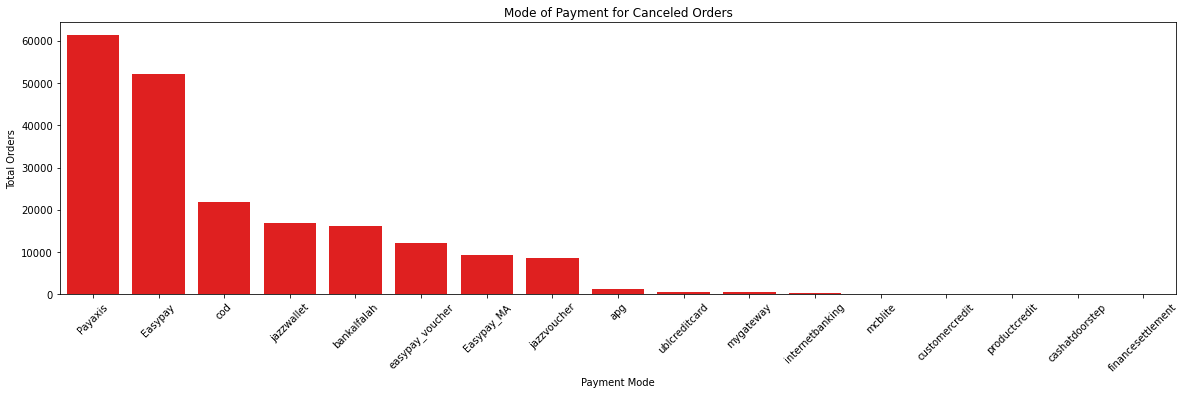

In [193]:

plt.figure(figsize = (20,5))
plt.title("Mode of Payment for Canceled Orders")
sns.barplot(corr_can.index, y=corr_can['Mode Of Payment'],color = 'r')
plt.xticks(rotation = 45)
plt.xlabel("Payment Mode")
plt.ylabel("Total Orders")
plt.show()

In [194]:
data.columns

Index(['item_id', 'status', 'Order_Date', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

### Year Wise Revenue

In [195]:
data['Year'].value_counts()

2017    290920
2018    159695
2016    133909
Name: Year, dtype: int64

In [198]:
year_wise_sales = data.groupby('Year')['grand_total'].sum()

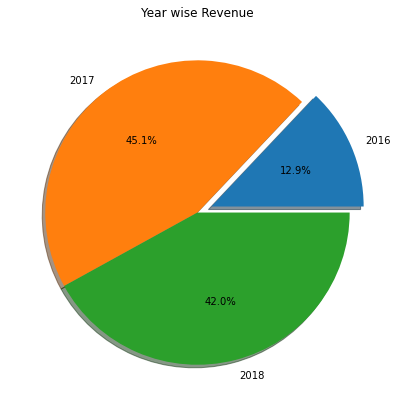

In [204]:
plt.figure(figsize = (15,7))
plt.title("Year wise Revenue")
explode=(0.1,0,0)
plt.pie(year_wise_sales, labels = year_wise_sales.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()
  

#### Revenue contribution at 2016 is the lowest of lot

###  Seasonality over the years across months

In [213]:
data.columns

Index(['item_id', 'status', 'Order_Date', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', 'MV', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID'],
      dtype='object')

In [251]:
df = data[['grand_total','Month','Year','M-Y']]


y_16 = data[data['Year']==2016]
y_17 = data[data['Year']==2017]
y_18 = data[data['Year']==2018]


##### Let's convert datatype of Month into string and convert the values to corresponding month names

In [ ]:
data['Month'] = data['Month'].astype('str')


In [ ]:
#df['column name'] = df['column name'].replace(['1st old value','2nd old value',...],['1st new value','2nd new value',...])
data['Month'] = data['Month'].replace(['1','2','3','4','5','6','7','8','9','10','11','12'], \
                                      ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

In [252]:
data['Month'].unique()

array(['Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun'], dtype=object)

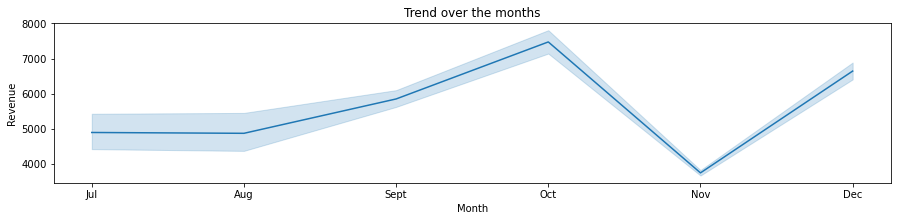

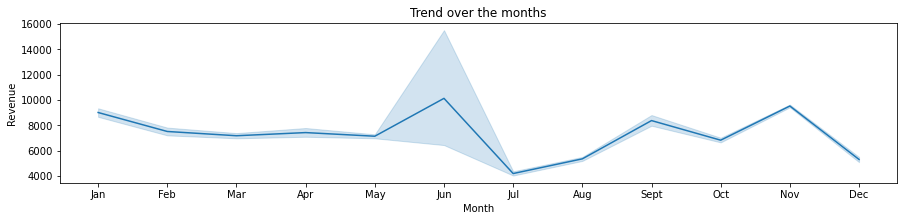

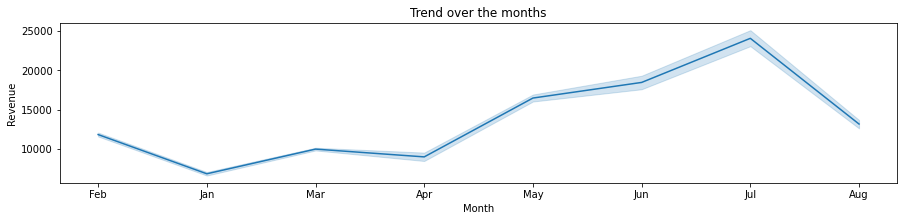

In [254]:

plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
plt.title("Trend over the months")
sns.lineplot(data=y_16, x= 'Month', y ='grand_total')
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(3,1,2)
plt.title("Trend over the months")
sns.lineplot(data=y_17, x= 'Month', y ='grand_total')
plt.ylabel("Revenue")
plt.show()

plt.figure(figsize = (15,10))
plt.subplot(3,1,3)
plt.title("Trend over the months")
sns.lineplot(data=y_18, x= 'Month', y ='grand_total')
plt.ylabel("Revenue")
plt.show()